In [1]:
from utils import *

# Load socialmuse24 data

In [2]:
df = load_csv_data("","data/df_annotated_socialmuse")

## 5 Understanding Human-Annotated Ground Truth Characteristics

### 5.1 Distributional Properties of Idea Buckets

In [3]:
results = analyze_power_law_fit_per_round(df, annotators=['ali', 'krish'])
extended_summary_df = summarize_bucket_counts_with_powerlaw(results)
print(extended_summary_df)

  annotator  mean_alpha  alpha_CI_lower  alpha_CI_upper  \
0       ali    2.008461        1.733171        2.283751   
1     krish    1.737258        1.596333        1.878183   

   prop_significant_powerlaw  mean_n_buckets  n_buckets_CI_lower  \
0                        0.0           399.6          354.125592   
1                        0.0           230.8          192.777905   

   n_buckets_CI_upper  n_rounds  
0          445.074408         5  
1          268.822095         5  


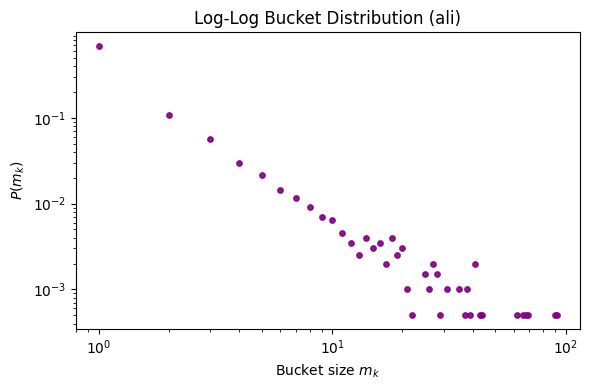

In [4]:
plot_loglog_scatter(df, 'ali',save_fig = False)

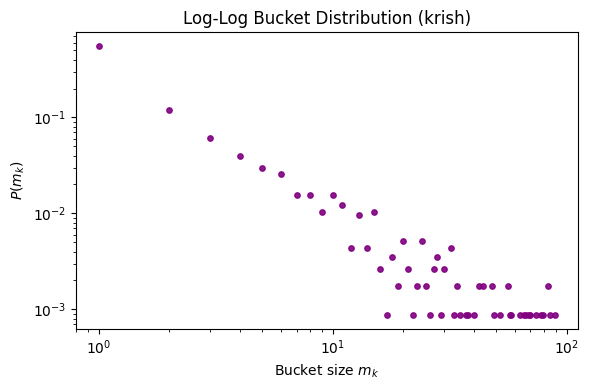

In [5]:
plot_loglog_scatter(df, 'krish',save_fig = False)

### 5.2 Inter Human Annotator Agreement on Idea-level Bucketing

In [6]:
summarize_mean_clustering_agreement(df, annotator1='ali', annotator2='krish')

,Metric,Mean,CI_lower,CI_upper,n_rounds
0,AMI,0.658806,0.640476,0.677137,5
1,NMI,0.853420,0.837655,0.869184,5
2,V-measure,0.853420,0.837655,0.869184,5
3,Homogeneity,0.796073,0.771163,0.820982,5
4,Completeness,0.920399,0.889186,0.951612,5


### 5.3 Inter Human Annotator Agreement on Participant-level Originality Scoring

In [7]:
corr_dataframes = generate_icc_dataframe(df,['ali','krish'])
for scoring_method in ['norm_orig','norm_shap','norm_rarity','norm_nonredun']:
    print(f"Scoring method: {scoring_method}")
    for corr_method in ['pearson','spearman']:
        print(f"Correlation method: {corr_method}")
        print_correlations2(corr_dataframes[scoring_method]['ali'],corr_dataframes[scoring_method]['krish'],corr=corr_method)
    print(" ")

Scoring method: norm_orig
Correlation method: pearson
Pearson's r = 0.774, 95% CI = [0.686, 0.840], p = 0.00000, n = 109
Correlation method: spearman
Spearman's rho = 0.749, 95% CI = [0.653, 0.821], p = 0.00000, n = 109
 
Scoring method: norm_shap
Correlation method: pearson
Pearson's r = 0.787, 95% CI = [0.702, 0.849], p = 0.00000, n = 109
Correlation method: spearman
Spearman's rho = 0.741, 95% CI = [0.643, 0.816], p = 0.00000, n = 109
 
Scoring method: norm_rarity
Correlation method: pearson
Pearson's r = 0.719, 95% CI = [0.613, 0.799], p = 0.00000, n = 109
Correlation method: spearman
Spearman's rho = 0.636, 95% CI = [0.509, 0.736], p = 0.00000, n = 109
 
Scoring method: norm_nonredun
Correlation method: pearson
Pearson's r = 0.734, 95% CI = [0.634, 0.811], p = 0.00000, n = 109
Correlation method: spearman
Spearman's rho = 0.665, 95% CI = [0.545, 0.758], p = 0.00000, n = 109
 


In [8]:
for scoring_method in ['norm_orig','norm_shap','norm_rarity','norm_nonredun']:
    print(f"Scoring method: {scoring_method}")
    print_ICC(corr_dataframes[scoring_method])
    print("")

Scoring method: norm_orig
ICC(3,k) = 0.853, 95% CI [0.785, 0.899], F(108, 108) = 6.79, p < .001

Scoring method: norm_shap
ICC(3,k) = 0.850, 95% CI [0.781, 0.897], F(108, 108) = 6.67, p < .001

Scoring method: norm_rarity
ICC(3,k) = 0.825, 95% CI [0.745, 0.881], F(108, 108) = 5.73, p < .001

Scoring method: norm_nonredun
ICC(3,k) = 0.799, 95% CI [0.706, 0.862], F(108, 108) = 4.97, p < .001



## 7 Results and Discussion

### 7.2 Distributional Properties of Computationally-labeled Idea Buckets

In [9]:
results = analyze_power_law_fit_per_round(df, annotators=['llama33k10CoTr3001', 'qwen3k10CoTr3001','phi4k10CoTr3001','llama33k10BSLr3001','phi4k10BSLr3001'])
extended_summary_df = summarize_bucket_counts_with_powerlaw(results)
print(extended_summary_df)

            annotator  mean_alpha  alpha_CI_lower  alpha_CI_upper  \
0  llama33k10CoTr3001    2.281627        2.142333        2.420922   
1    qwen3k10CoTr3001    2.432758        2.195749        2.669767   
2     phi4k10CoTr3001    2.387317        1.723845        3.050790   
3  llama33k10BSLr3001    2.286149        1.967105        2.605192   
4     phi4k10BSLr3001    2.508568        2.233039        2.784096   

   prop_significant_powerlaw  mean_n_buckets  n_buckets_CI_lower  \
0                        0.0           465.4          426.842384   
1                        0.0           462.4          432.682957   
2                        0.0           255.0          207.329157   
3                        0.0           367.8          333.284867   
4                        0.0           275.6          229.460862   

   n_buckets_CI_upper  n_rounds  
0          503.957616         5  
1          492.117043         5  
2          302.670843         5  
3          402.315133         5  
4     

In [10]:
results = analyze_power_law_fit_per_round(df, annotators=['kmm_sil_r3001', 'kmm_sem_r3001','agg_sil_r3001','agg_sem_r3001'])
extended_summary_df = summarize_bucket_counts_with_powerlaw(results)
print(extended_summary_df)

       annotator  mean_alpha  alpha_CI_lower  alpha_CI_upper  \
0  kmm_sil_r3001    3.124218        2.818945        3.429491   
1  kmm_sem_r3001    3.116135        2.666880        3.565389   
2  agg_sil_r3001    5.675473        1.259554       10.091392   
3  agg_sem_r3001    3.799182        2.625024        4.973340   

   prop_significant_powerlaw  mean_n_buckets  n_buckets_CI_lower  \
0                        0.0           830.6          729.236556   
1                        0.0           797.4          757.816422   
2                        0.0           588.0          524.937402   
3                        0.0           838.0          815.945167   

   n_buckets_CI_upper  n_rounds  
0          931.963444         5  
1          836.983578         5  
2          651.062598         5  
3          860.054833         5  


C:\anaconda\lib\site-packages\powerlaw.py:1570: RuntimeWarning: invalid value encountered in divide
  return likelihoods/norm


### 7.3 Construct Validity of Idea-level Bucketing

In [11]:
for annotator in ['ali','krish']:
    for model_ in ['llama33k10CoTr3001', 'qwen3k10CoTr3001','phi4k10CoTr3001','llama33k10BSLr3001','phi4k10BSLr3001','kmm_sil_r3001', 'kmm_sem_r3001','agg_sil_r3001','agg_sem_r3001']:
        print(f"Bucketing performance of {model_} against annotator {annotator}")
        print(summarize_mean_clustering_agreement(df, annotator1=annotator, annotator2=model_))
        print("")

Bucketing performance of llama33k10CoTr3001 against annotator ali
         Metric      Mean  CI_lower  CI_upper  n_rounds
0           AMI  0.591008  0.545831  0.636184         5
1           NMI  0.878550  0.861242  0.895857         5
2     V-measure  0.878550  0.861242  0.895857         5
3   Homogeneity  0.919293  0.901805  0.936782         5
4  Completeness  0.841747  0.809169  0.874325         5

Bucketing performance of qwen3k10CoTr3001 against annotator ali
         Metric      Mean  CI_lower  CI_upper  n_rounds
0           AMI  0.556689  0.504280  0.609098         5
1           NMI  0.869734  0.846360  0.893108         5
2     V-measure  0.869734  0.846360  0.893108         5
3   Homogeneity  0.913518  0.894667  0.932370         5
4  Completeness  0.830440  0.792218  0.868662         5

Bucketing performance of phi4k10CoTr3001 against annotator ali
         Metric      Mean  CI_lower  CI_upper  n_rounds
0           AMI  0.539035  0.530759  0.547311         5
1           NMI  0.82

### 7.4 Construct Validity of Participant-level Originality Scoring

Participant Level Normalized Threshold Scoring performance against annotator ali


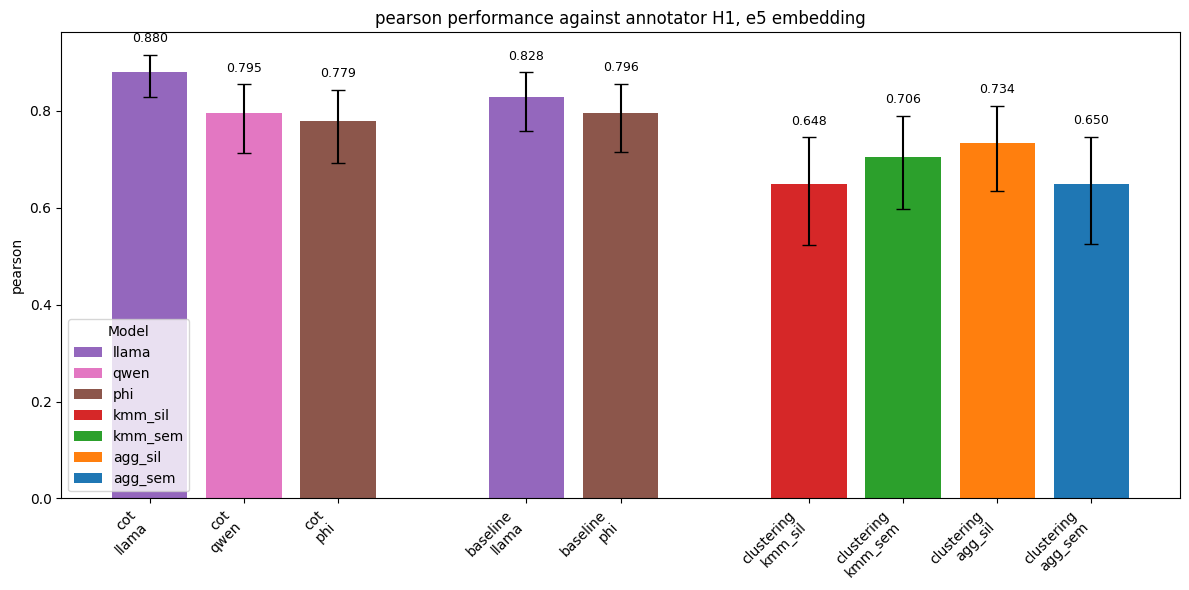

{'cot': {'llama': {'mean': 0.879802165157364, 'ci_lower': 0.8288724538668025, 'ci_upper': 0.9162685030612169}, 'qwen': {'mean': 0.7947179825791179, 'ci_lower': 0.7132364187198856, 'ci_upper': 0.8550066269334066}, 'phi': {'mean': 0.7785525998763543, 'ci_lower': 0.6917566179275181, 'ci_upper': 0.8431739543415244}}, 'baseline': {'llama': {'mean': 0.8284126625934038, 'ci_lower': 0.7585057412318894, 'ci_upper': 0.8794701952870043}, 'phi': {'mean': 0.795779735048796, 'ci_lower': 0.7146526019414877, 'ci_upper': 0.8557816137723441}}, 'clustering': {'kmm_sil': {'mean': 0.6482964737445874, 'ci_lower': 0.5241073848389475, 'ci_upper': 0.7454890270762615}, 'kmm_sem': {'mean': 0.7057908755165769, 'ci_lower': 0.5969390705257224, 'ci_upper': 0.7891276346713133}, 'agg_sil': {'mean': 0.7343887545572877, 'ci_lower': 0.6338464473034477, 'ci_upper': 0.810524757294903}, 'agg_sem': {'mean': 0.6499479918921722, 'ci_lower': 0.526174427835482, 'ci_upper': 0.7467542722747623}}}

Participant Level Normalized Thre

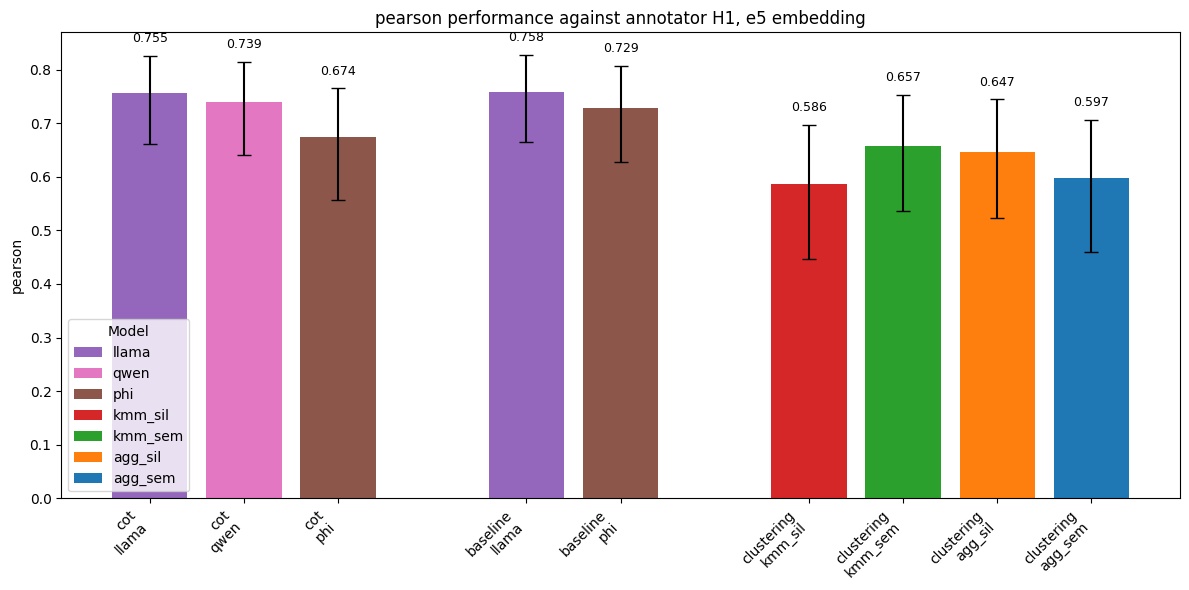

{'cot': {'llama': {'mean': 0.755314902488055, 'ci_lower': 0.661146212106149, 'ci_upper': 0.8260541299649733}, 'qwen': {'mean': 0.7392249025646013, 'ci_lower': 0.6401333943728276, 'ci_upper': 0.8141232169164583}, 'phi': {'mean': 0.6738966635941014, 'ci_lower': 0.5563139186307909, 'ci_upper': 0.7650231873146106}}, 'baseline': {'llama': {'mean': 0.7579278964642014, 'ci_lower': 0.6645726663337054, 'ci_upper': 0.8279857279935128}, 'phi': {'mean': 0.7289689332430058, 'ci_lower': 0.626816482723517, 'ci_upper': 0.8064851589036964}}, 'clustering': {'kmm_sil': {'mean': 0.5861608626158435, 'ci_lower': 0.44738708686683604, 'ci_upper': 0.6973718513080782}, 'kmm_sem': {'mean': 0.6574820573437161, 'ci_lower': 0.5356226694360606, 'ci_upper': 0.7525173227936273}, 'agg_sil': {'mean': 0.6470863988422407, 'ci_lower': 0.5225937811863439, 'ci_upper': 0.7445615312737837}, 'agg_sem': {'mean': 0.5969367471342055, 'ci_lower': 0.4605475258585968, 'ci_upper': 0.7057890639869293}}}



In [12]:
for annotator in ['ali','krish']:
    print(f"Participant Level Normalized Threshold Scoring performance against annotator {annotator}")
    data_dict = get_grouped_plots_person_level(df, eval_='pearson',scoring_method ='norm_orig', embedding_='e5',reference=annotator,save_fig=False)
    print(data_dict)
    print("")

Participant Level Normalized Threshold Scoring performance of agg_sem_r3001 against annotator ali


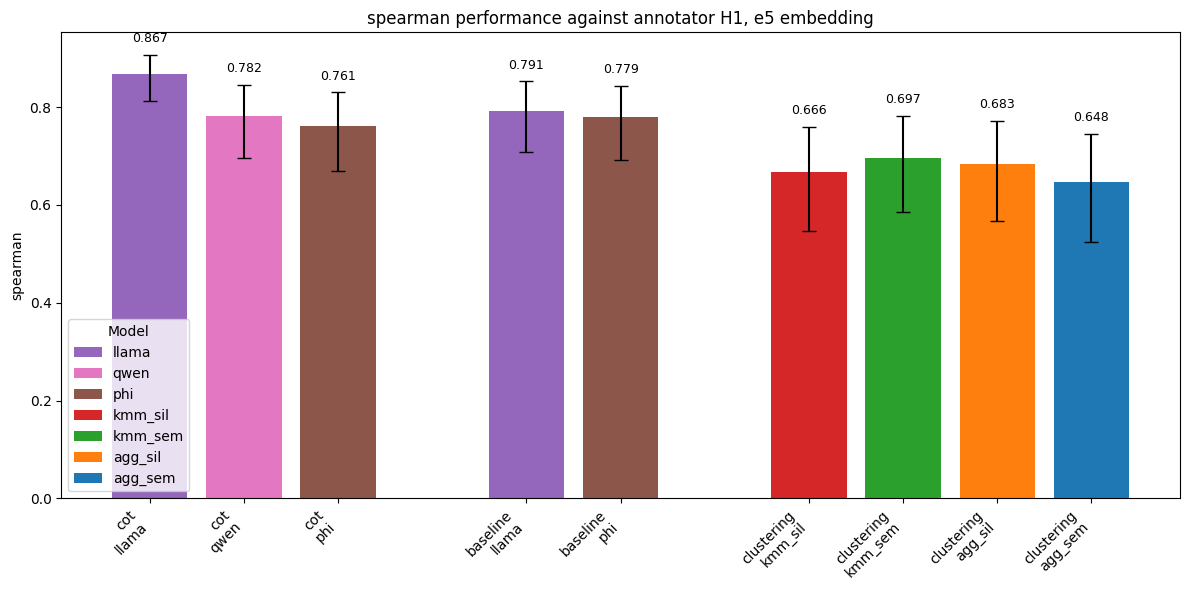

{'cot': {'llama': {'mean': 0.867492238543163, 'ci_lower': 0.8118686282657719, 'ci_upper': 0.9075094819184013}, 'qwen': {'mean': 0.7822540100608734, 'ci_lower': 0.696661357572715, 'ci_upper': 0.8458888351288001}, 'phi': {'mean': 0.7608637227190586, 'ci_lower': 0.6684271442039184, 'ci_upper': 0.8301539910724821}}, 'baseline': {'llama': {'mean': 0.7914131609099916, 'ci_lower': 0.7088326460713267, 'ci_upper': 0.8525926703395267}, 'phi': {'mean': 0.7788266171452222, 'ci_lower': 0.6921194440147297, 'ci_upper': 0.843375051357149}}, 'clustering': {'kmm_sil': {'mean': 0.6664156697436784, 'ci_lower': 0.5468657174048022, 'ci_upper': 0.7593321221873087}, 'kmm_sem': {'mean': 0.6967503672303484, 'ci_lower': 0.5853667829989774, 'ci_upper': 0.7823211262919378}, 'agg_sil': {'mean': 0.6830938767187216, 'ci_lower': 0.56797145084078, 'ci_upper': 0.7720003924305646}, 'agg_sem': {'mean': 0.6478749237921382, 'ci_lower': 0.5235800064764519, 'ci_upper': 0.7451659610262925}}}

Participant Level Normalized Thres

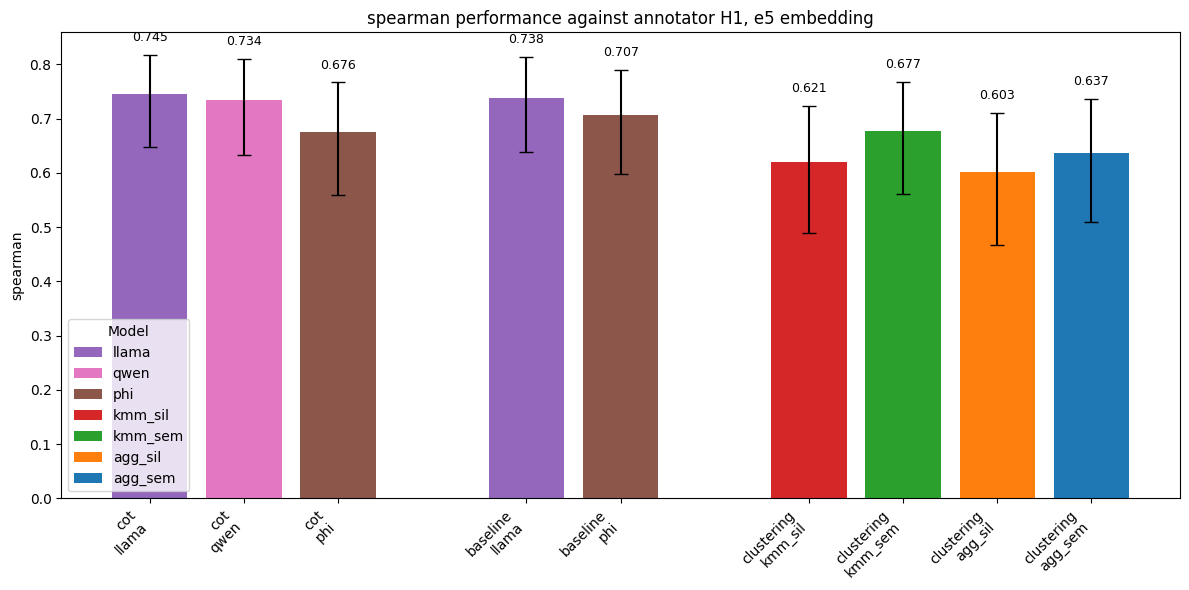

{'cot': {'llama': {'mean': 0.7448796605637145, 'ci_lower': 0.6475013968974628, 'ci_upper': 0.8183235015996757}, 'qwen': {'mean': 0.733580472888057, 'ci_lower': 0.6327969829141408, 'ci_upper': 0.8099227735259923}, 'phi': {'mean': 0.6763528355331762, 'ci_lower': 0.5594226108182109, 'ci_upper': 0.7668885885682308}}, 'baseline': {'llama': {'mean': 0.7380481272350711, 'ci_lower': 0.638602374711023, 'ci_upper': 0.8132481363725091}, 'phi': {'mean': 0.707172003478836, 'ci_lower': 0.598710978488436, 'ci_upper': 0.7901656730126786}}, 'clustering': {'kmm_sil': {'mean': 0.620807499467104, 'ci_lower': 0.4899156588187903, 'ci_upper': 0.7243260734123217}, 'kmm_sem': {'mean': 0.6772271264063466, 'ci_lower': 0.5605299650709699, 'ci_upper': 0.7675522216819949}, 'agg_sil': {'mean': 0.6026487919972713, 'ci_lower': 0.4675479691006873, 'ci_upper': 0.710238403123306}, 'agg_sem': {'mean': 0.636955514392508, 'ci_lower': 0.5099524320433412, 'ci_upper': 0.7367816385322618}}}



In [13]:
for annotator in ['ali','krish']:
    print(f"Participant Level Normalized Threshold Scoring performance of {model_} against annotator {annotator}")
    data_dict = get_grouped_plots_person_level(df, eval_='spearman',scoring_method ='norm_orig', embedding_='e5',reference=annotator,save_fig=False)
    print(data_dict)
    print("")

Participant Level Normalized Threshold Scoring performance of agg_sem_r3001 against annotator ali


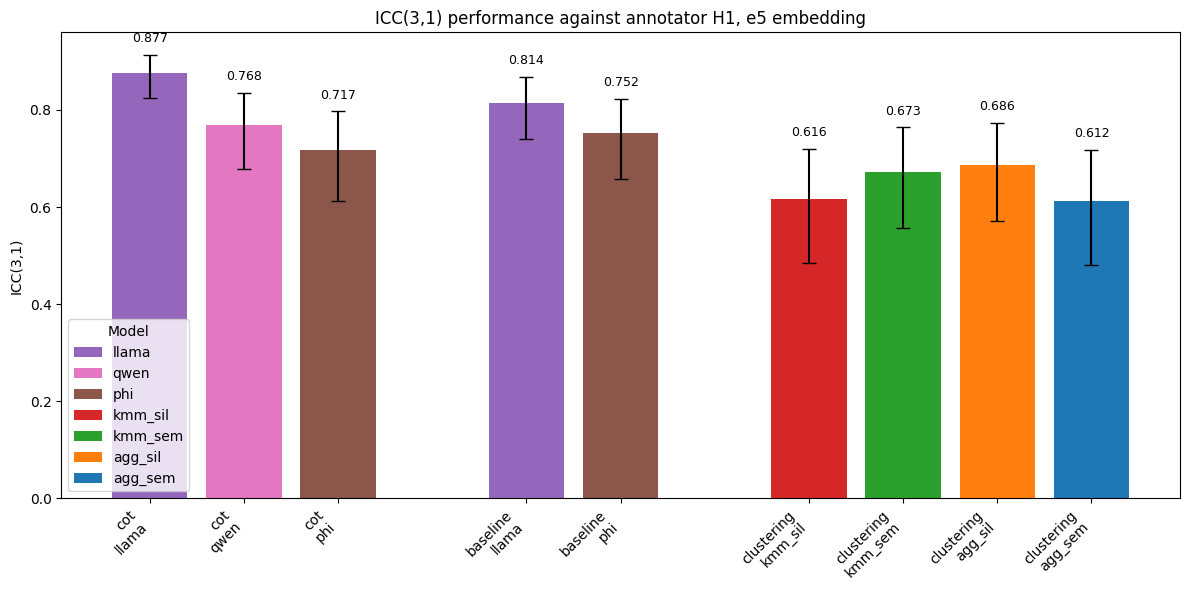

{'cot': {'llama': {'mean': 0.8767788892115732, 'ci_lower': 0.8249343536947917, 'ci_upper': 0.9139935911971768}, 'qwen': {'mean': 0.7681434779521651, 'ci_lower': 0.6784230426629982, 'ci_upper': 0.8352883052290452}, 'phi': {'mean': 0.7167444763358435, 'ci_lower': 0.6115045477159776, 'ci_upper': 0.7970658884318695}}, 'baseline': {'llama': {'mean': 0.8137475534056486, 'ci_lower': 0.739070067550306, 'ci_upper': 0.8686665696608927}, 'phi': {'mean': 0.7519023298462464, 'ci_lower': 0.6571158945744887, 'ci_upper': 0.8232804503440891}}, 'clustering': {'kmm_sil': {'mean': 0.6162892095752157, 'ci_lower': 0.48492441751260656, 'ci_upper': 0.7204578500834123}, 'kmm_sem': {'mean': 0.6731427965084147, 'ci_lower': 0.5558939259773515, 'ci_upper': 0.76412939823069}, 'agg_sil': {'mean': 0.685616311469831, 'ci_lower': 0.5716964864791693, 'ci_upper': 0.7736005258880397}, 'agg_sem': {'mean': 0.6124076865046764, 'ci_lower': 0.48014144943061404, 'ci_upper': 0.7174458591800073}}}

Participant Level Normalized Th

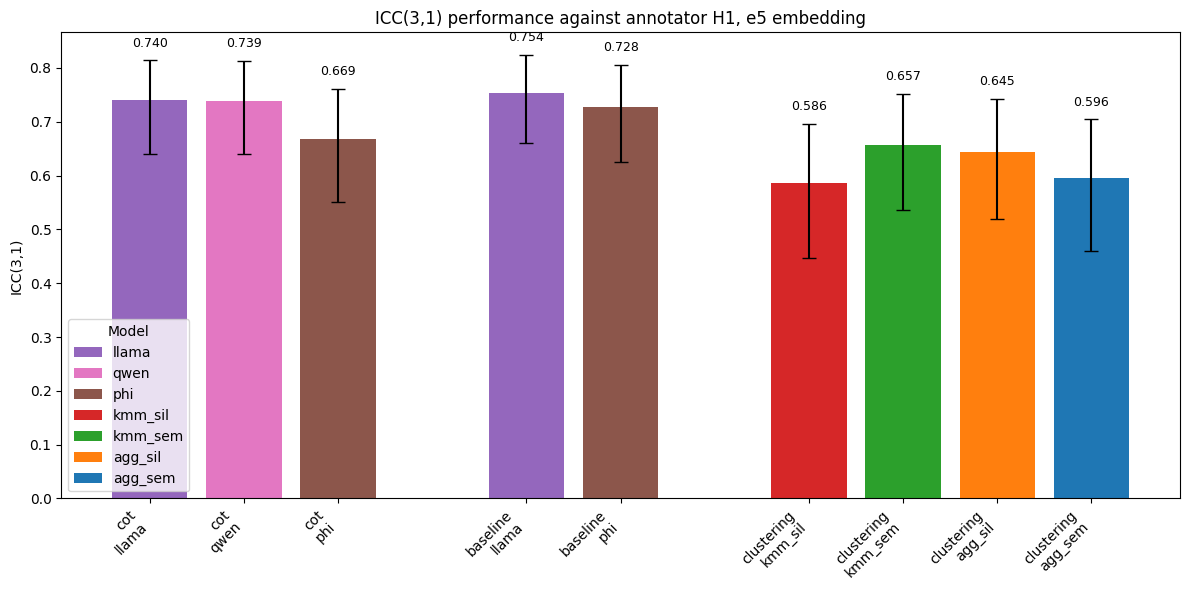

{'cot': {'llama': {'mean': 0.7395434970696628, 'ci_lower': 0.641002902987329, 'ci_upper': 0.8140999724280494}, 'qwen': {'mean': 0.7389576684786261, 'ci_lower': 0.6402412712722955, 'ci_upper': 0.8136638759239163}, 'phi': {'mean': 0.6688171737968885, 'ci_lower': 0.5504335607875193, 'ci_upper': 0.7608357707094334}}, 'baseline': {'llama': {'mean': 0.7541812188687371, 'ci_lower': 0.6600965153562478, 'ci_upper': 0.8249692034850563}, 'phi': {'mean': 0.7280323865244076, 'ci_lower': 0.6260728592633646, 'ci_upper': 0.8055155549461026}}, 'clustering': {'kmm_sil': {'mean': 0.5858663626969628, 'ci_lower': 0.44764557148408646, 'ci_upper': 0.6967444951574594}, 'kmm_sem': {'mean': 0.6573368834025478, 'ci_lower': 0.5359905842176537, 'ci_upper': 0.7520713687424698}, 'agg_sil': {'mean': 0.6447083023477733, 'ci_lower': 0.5201846040014039, 'ci_upper': 0.7423914718729475}, 'agg_sem': {'mean': 0.5958898937142292, 'ci_lower': 0.4598751322267856, 'ci_upper': 0.7045842860851225}}}



In [14]:
for annotator in ['ali','krish']:
    print(f"Participant Level Normalized Threshold Scoring performance of {model_} against annotator {annotator}")
    data_dict = get_grouped_plots_person_level(df, eval_='ICC(3,1)',scoring_method ='norm_orig', embedding_='e5',reference=annotator,save_fig=False)
    print(data_dict)
    print("")

C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\anaconda\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


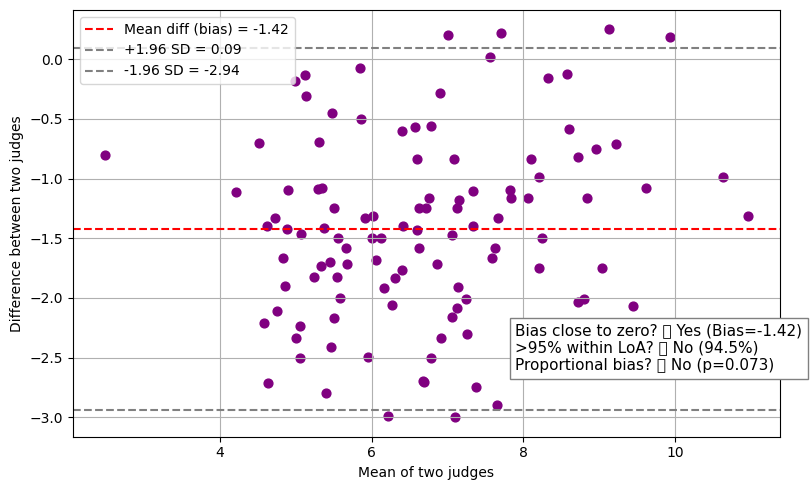

In [15]:
icc_df = generate_icc_dataframe(df,['ali', get_llm_colname('llama', 'e5', 'cot', 10)])['norm_orig']
bland_altman_plot_analysis_wrapper(icc_df,['ali',get_llm_colname('llama', 'e5', 'cot', 10)],save_fig=False)

# Convergent and External Validity

## Analyze CQ in socialmuse24

In [16]:
df_cq = load_csv_data("","data/df_cq")
df_cq = df_cq.groupby('for_user_id')['cq'].sum().reset_index()
cq_scores_dict = pd.Series(df_cq['cq'].values, index = df_cq['for_user_id']).to_dict()
llama_name = get_llm_colname('llama', 'e5', 'cot', 10)

In [17]:
t = generate_icc_dataframe_allrounds(df,[llama_name])['norm_orig']
score_df = t.groupby('for_user_id')[[llama_name]].sum().reset_index()
score_df['cq'] = score_df['for_user_id'].map(cq_scores_dict)

print_pearson_result(pearson_corr_with_ci(score_df[llama_name],score_df['cq'], alpha=0.05))
print_spearman_result(spearman_corr_with_ci(score_df[llama_name],score_df['cq'], alpha=0.05))

Pearson's r = 0.401, 95% CI = [0.230, 0.547], p = 0.00002, n = 109
Spearman's rho = 0.331, 95% CI = [0.153, 0.489], p = 0.00043, n = 109


In [18]:
t = generate_icc_dataframe_allrounds(df,[llama_name])['orig']
score_df = t.groupby('for_user_id')[[llama_name]].sum().reset_index()
score_df['cq'] = score_df['for_user_id'].map(cq_scores_dict)

print_pearson_result(pearson_corr_with_ci(score_df[llama_name],score_df['cq'], alpha=0.05))
print_spearman_result(spearman_corr_with_ci(score_df[llama_name],score_df['cq'], alpha=0.05))

Pearson's r = 0.482, 95% CI = [0.323, 0.615], p = 0.00000, n = 109
Spearman's rho = 0.447, 95% CI = [0.283, 0.586], p = 0.00000, n = 109


## Analyze beaty18 data

In [19]:
df_semdis1 = load_csv_data("","data/df_annotated_semdis1")
df_s1_all = load_csv_data("","data/s1_data_all")
df_s1_agg = load_csv_data("","data/s1_data_agg")

meta_rater_col = ['meta1_r1', 'meta1_r2', 'meta1_r3', 'meta1_r4']
rater_col = ['rater1', 'rater2', 'rater3', 'rater4']
gf_col = ['gf_cfiq', 'gf_letters', 'gf_numbers'] 

In [20]:
df_llama_scores = generate_icc_dataframe_allrounds(df_semdis1,['llama33k10'])['norm_orig']
score_df = df_llama_scores.groupby('for_user_id')[['llama33k10']].sum().reset_index()

mean_rating_dict = get_mean_avg_rating_per_user(df_s1_all,rater_col)
score_df['mean_creative_quality_rating'] = score_df['for_user_id'].map(mean_rating_dict)

n,e,o,a,c = get_personality_dicts(df_s1_agg)
score_df['n'] = score_df['for_user_id'].map(n)
score_df['e'] = score_df['for_user_id'].map(e)
score_df['o'] = score_df['for_user_id'].map(o)
score_df['a'] = score_df['for_user_id'].map(a)
score_df['c'] = score_df['for_user_id'].map(c)

meta_dict = get_mean_metaphor_rating(df_s1_agg,meta_rater_col)
score_df['meta'] = score_df['for_user_id'].map(meta_dict)

gf_dict = get_gf_score_dict(df_s1_agg,gf_col)
score_df['Gf'] = score_df['for_user_id'].map(gf_dict)

ssci_identity_dict = get_ssci_identity_score_dict(df_s1_agg)
score_df['ssci_identity'] = score_df['for_user_id'].map(ssci_identity_dict)

ssci_efficacy_dict = get_ssci_efficacy_score_dict(df_s1_agg)
score_df['ssci_efficacy'] = score_df['for_user_id'].map(ssci_efficacy_dict)

In [21]:
print_pearson_result(pearson_corr_with_ci(score_df['llama33k10'], score_df['mean_creative_quality_rating'], alpha=0.05))
print_spearman_result(spearman_corr_with_ci(score_df['llama33k10'], score_df['mean_creative_quality_rating'], alpha=0.05))

Pearson's r = 0.774, 95% CI = [0.706, 0.828], p = 0.00000, n = 171
Spearman's rho = 0.791, 95% CI = [0.728, 0.842], p = 0.00000, n = 171


In [22]:
l1,l2 = get_clean_sorted_lists(score_df, 'llama33k10', 'o') # semdis doesn't achieve this!
print_pearson_result(pearson_corr_with_ci(l1,l2, alpha=0.05))
print_spearman_result(spearman_corr_with_ci(l1,l2, alpha=0.05))

Pearson's r = 0.147, 95% CI = [-0.005, 0.292], p = 0.05792, n = 167
Spearman's rho = 0.158, 95% CI = [0.007, 0.303], p = 0.04099, n = 167


In [23]:
l1,l2 = get_clean_sorted_lists(score_df, 'llama33k10', 'n') # semdis doesn't achieve this!
print_pearson_result(pearson_corr_with_ci(l1,l2, alpha=0.05))
print_spearman_result(spearman_corr_with_ci(l1,l2, alpha=0.05))

Pearson's r = -0.128, 95% CI = [-0.275, 0.024], p = 0.09887, n = 167
Spearman's rho = -0.107, 95% CI = [-0.255, 0.046], p = 0.16841, n = 167


In [24]:
l1,l2 = get_clean_sorted_lists(score_df, 'llama33k10', 'e') # semdis doesn't achieve this!
print_pearson_result(pearson_corr_with_ci(l1,l2, alpha=0.05))
print_spearman_result(spearman_corr_with_ci(l1,l2, alpha=0.05))

Pearson's r = 0.037, 95% CI = [-0.116, 0.187], p = 0.63806, n = 167
Spearman's rho = -0.004, 95% CI = [-0.156, 0.148], p = 0.95652, n = 167


In [25]:
l1,l2 = get_clean_sorted_lists(score_df, 'llama33k10', 'a') # semdis doesn't achieve this!
print_pearson_result(pearson_corr_with_ci(l1,l2, alpha=0.05))
print_spearman_result(spearman_corr_with_ci(l1,l2, alpha=0.05))

Pearson's r = -0.087, 95% CI = [-0.236, 0.066], p = 0.26416, n = 167
Spearman's rho = -0.051, 95% CI = [-0.201, 0.102], p = 0.51633, n = 167


In [26]:
l1,l2 = get_clean_sorted_lists(score_df, 'llama33k10', 'c') # semdis doesn't achieve this!
print_pearson_result(pearson_corr_with_ci(l1,l2, alpha=0.05))
print_spearman_result(spearman_corr_with_ci(l1,l2, alpha=0.05))

Pearson's r = -0.040, 95% CI = [-0.190, 0.113], p = 0.61109, n = 167
Spearman's rho = -0.093, 95% CI = [-0.242, 0.059], p = 0.23033, n = 167


In [27]:
l1,l2 = get_clean_sorted_lists(score_df, 'llama33k10', 'meta')
print_pearson_result(pearson_corr_with_ci(l1,l2, alpha=0.05))
print_spearman_result(spearman_corr_with_ci(l1,l2, alpha=0.05))

Pearson's r = 0.174, 95% CI = [0.015, 0.323], p = 0.03179, n = 153
Spearman's rho = 0.168, 95% CI = [0.010, 0.318], p = 0.03789, n = 153


In [28]:
l1,l2 = get_clean_sorted_lists(score_df, 'llama33k10', 'Gf') #none of the tasks individually give significance
print_pearson_result(pearson_corr_with_ci(l1,l2, alpha=0.05))
print_spearman_result(spearman_corr_with_ci(l1,l2, alpha=0.05))

Pearson's r = 0.111, 95% CI = [-0.050, 0.266], p = 0.17573, n = 151
Spearman's rho = 0.083, 95% CI = [-0.077, 0.240], p = 0.30898, n = 151


In [29]:
l1,l2 = get_clean_sorted_lists(score_df, 'llama33k10', 'ssci_identity')
print_pearson_result(pearson_corr_with_ci(l1,l2, alpha=0.05))
print_spearman_result(spearman_corr_with_ci(l1,l2, alpha=0.05))

Pearson's r = 0.339, 95% CI = [0.185, 0.478], p = 0.00004, n = 142
Spearman's rho = 0.329, 95% CI = [0.173, 0.468], p = 0.00006, n = 142


In [30]:
l1,l2 = get_clean_sorted_lists(score_df, 'llama33k10', 'ssci_efficacy')
print_pearson_result(pearson_corr_with_ci(l1,l2, alpha=0.05))
print_spearman_result(spearman_corr_with_ci(l1,l2, alpha=0.05))

Pearson's r = 0.294, 95% CI = [0.136, 0.438], p = 0.00038, n = 142
Spearman's rho = 0.275, 95% CI = [0.115, 0.420], p = 0.00095, n = 142


## Analyze silvia17 dataset

In [31]:
df_semdis2 = load_csv_data("","data/df_annotated_semdis2")
df_s2_all = load_csv_data("","data/s2_data_all")
df_s2_agg = load_csv_data("","data/s2_data_agg")

rater_col = ['rater1', 'rater2', 'rater3']

In [32]:
df_llama_scores = generate_icc_dataframe_allrounds(df_semdis2,['llama33k10'])['norm_orig']
score_df = df_llama_scores.groupby('for_user_id')[['llama33k10']].sum().reset_index()

mean_rating_dict = get_mean_avg_rating_per_user(df_s2_all,rater_col)
score_df['mean_creative_quality_rating'] = score_df['for_user_id'].map(mean_rating_dict)

o_dict = get_o_score_dict(df_s2_agg)
score_df['openness'] = score_df['for_user_id'].map(o_dict)

In [33]:
print_pearson_result(pearson_corr_with_ci(score_df['llama33k10'], score_df['mean_creative_quality_rating'], alpha=0.05))
print_spearman_result(spearman_corr_with_ci(score_df['llama33k10'], score_df['mean_creative_quality_rating'], alpha=0.05))

Pearson's r = 0.540, 95% CI = [0.411, 0.648], p = 0.00000, n = 141
Spearman's rho = 0.549, 95% CI = [0.422, 0.655], p = 0.00000, n = 141


In [34]:
l1,l2 = get_clean_sorted_lists(score_df, 'llama33k10', 'openness') 
print_pearson_result(pearson_corr_with_ci(l1,l2, alpha=0.05))
print_spearman_result(spearman_corr_with_ci(l1,l2, alpha=0.05))

Pearson's r = 0.127, 95% CI = [-0.039, 0.286], p = 0.13399, n = 141
Spearman's rho = 0.143, 95% CI = [-0.023, 0.301], p = 0.09014, n = 141


### Analyze beaty12 dataset

In [35]:
df_semdis3 = load_csv_data("","data/df_annotated_semdis3")
df_s3_all = load_csv_data("","data/s3_data_all")
df_s3_agg = load_csv_data("","data/s3_data_agg")

meta_rater_col = ['meta1_r1', 'meta1_r2', 'meta1_r3']
rater_col = ['rater1', 'rater2', 'rater3']
gf_col = ['gf_ravens'] 

In [36]:
df_llama_scores = generate_icc_dataframe_allrounds(df_semdis3,['llama33k10'])['norm_orig']
score_df = df_llama_scores.groupby('for_user_id')[['llama33k10']].sum().reset_index()

mean_rating_dict = get_mean_avg_rating_per_user(df_s3_all,rater_col)
score_df['mean_creative_quality_rating'] = score_df['for_user_id'].map(mean_rating_dict)

n,e,o,a,c = get_personality_dicts(df_s3_agg)
score_df['n'] = score_df['for_user_id'].map(n)
score_df['e'] = score_df['for_user_id'].map(e)
score_df['o'] = score_df['for_user_id'].map(o)
score_df['a'] = score_df['for_user_id'].map(a)
score_df['c'] = score_df['for_user_id'].map(c)

meta_dict = get_mean_metaphor_rating(df_s3_agg,meta_rater_col)
score_df['meta'] = score_df['for_user_id'].map(meta_dict)

gf_dict = get_gf_score_dict(df_s3_agg,gf_col)
score_df['Gf'] = score_df['for_user_id'].map(gf_dict)

In [37]:
print_pearson_result(pearson_corr_with_ci(score_df['llama33k10'], score_df['mean_creative_quality_rating'], alpha=0.05))
print_spearman_result(spearman_corr_with_ci(score_df['llama33k10'], score_df['mean_creative_quality_rating'], alpha=0.05))

Pearson's r = 0.417, 95% CI = [0.266, 0.549], p = 0.00000, n = 133
Spearman's rho = 0.378, 95% CI = [0.222, 0.515], p = 0.00001, n = 133


In [38]:
l1,l2 = get_clean_sorted_lists(score_df, 'llama33k10', 'o') 
print_pearson_result(pearson_corr_with_ci(l1,l2, alpha=0.05))
print_spearman_result(spearman_corr_with_ci(l1,l2, alpha=0.05))

Pearson's r = 0.304, 95% CI = [0.141, 0.451], p = 0.00038, n = 133
Spearman's rho = 0.251, 95% CI = [0.085, 0.404], p = 0.00350, n = 133


In [39]:
l1,l2 = get_clean_sorted_lists(score_df, 'llama33k10', 'n')
print_pearson_result(pearson_corr_with_ci(l1,l2, alpha=0.05))
print_spearman_result(spearman_corr_with_ci(l1,l2, alpha=0.05))

Pearson's r = 0.122, 95% CI = [-0.049, 0.287], p = 0.16045, n = 133
Spearman's rho = 0.118, 95% CI = [-0.053, 0.283], p = 0.17474, n = 133


In [40]:
l1,l2 = get_clean_sorted_lists(score_df, 'llama33k10', 'e')
print_pearson_result(pearson_corr_with_ci(l1,l2, alpha=0.05))
print_spearman_result(spearman_corr_with_ci(l1,l2, alpha=0.05))

Pearson's r = -0.091, 95% CI = [-0.257, 0.080], p = 0.29697, n = 133
Spearman's rho = -0.040, 95% CI = [-0.209, 0.131], p = 0.64816, n = 133


In [41]:
l1,l2 = get_clean_sorted_lists(score_df, 'llama33k10', 'a')
print_pearson_result(pearson_corr_with_ci(l1,l2, alpha=0.05))
print_spearman_result(spearman_corr_with_ci(l1,l2, alpha=0.05))

Pearson's r = 0.124, 95% CI = [-0.048, 0.288], p = 0.15616, n = 133
Spearman's rho = 0.152, 95% CI = [-0.019, 0.314], p = 0.08148, n = 133


In [42]:
l1,l2 = get_clean_sorted_lists(score_df, 'llama33k10', 'c')
print_pearson_result(pearson_corr_with_ci(l1,l2, alpha=0.05))
print_spearman_result(spearman_corr_with_ci(l1,l2, alpha=0.05))

Pearson's r = -0.087, 95% CI = [-0.253, 0.085], p = 0.32067, n = 133
Spearman's rho = -0.023, 95% CI = [-0.193, 0.148], p = 0.79098, n = 133


In [43]:
l1,l2 = get_clean_sorted_lists(score_df, 'llama33k10', 'meta')
print_pearson_result(pearson_corr_with_ci(l1,l2, alpha=0.05))
print_spearman_result(spearman_corr_with_ci(l1,l2, alpha=0.05))

Pearson's r = 0.249, 95% CI = [0.082, 0.402], p = 0.00391, n = 133
Spearman's rho = 0.206, 95% CI = [0.037, 0.364], p = 0.01717, n = 133


In [44]:
l1,l2 = get_clean_sorted_lists(score_df, 'llama33k10', 'Gf') #none of the tasks individually give significance
print_pearson_result(pearson_corr_with_ci(l1,l2, alpha=0.05))
print_spearman_result(spearman_corr_with_ci(l1,l2, alpha=0.05))

Pearson's r = 0.012, 95% CI = [-0.159, 0.181], p = 0.89484, n = 133
Spearman's rho = 0.035, 95% CI = [-0.136, 0.204], p = 0.69257, n = 133


## Analyze mohr16 dataset

In [46]:
method_name = 'orig'
df_hmsl1 = load_csv_data("","data/df_annotated_hmsl_brick")
df_hmsl1_all = load_csv_data("","data/HMSL_originality_brick")
df_hmsl1_agg = load_csv_data("","data/HMSL_scoredata")
rater_col = ['rater1', 'rater2', 'rater3','rater4']

df_hmsl2 = load_csv_data("","data/df_annotated_hmsl_paperclip")
df_hmsl2_all = load_csv_data("","data/HMSL_originality_paperclip")
df_hmsl2_agg = load_csv_data("","data/HMSL_scoredata")

In [47]:
df_llama_scores = generate_icc_dataframe_allrounds(df_hmsl1,['llama33k10'])[f'norm_{method_name}']
score_df1 = df_llama_scores.groupby('for_user_id')[['llama33k10']].sum().reset_index()
df_llama_scores_unn = generate_icc_dataframe_allrounds(df_hmsl1,['llama33k10'])[f'{method_name}']
score_df1_unn = df_llama_scores_unn.groupby('for_user_id')[['llama33k10']].sum().reset_index()
unnormalized_scores = pd.Series(score_df1_unn['llama33k10'].values, index=score_df1_unn['for_user_id']).to_dict()
score_df1['llama_unnormalized'] = score_df1['for_user_id'].map(unnormalized_scores)

mean_orig_rating_dict = get_mean_avg_rating_per_user(df_hmsl1_all,rater_col)
score_df1['mean_originality_rating'] = score_df1['for_user_id'].map(mean_orig_rating_dict)

flexibility_dict = get_flexibility_rating(df_hmsl1_agg)
score_df1['mean_flexibility_rating'] = score_df1['for_user_id'].map(flexibility_dict)

df_llama_scores = generate_icc_dataframe_allrounds(df_hmsl2,['llama33k10'])[f'norm_{method_name}']
score_df2 = df_llama_scores.groupby('for_user_id')[['llama33k10']].sum().reset_index()
df_llama_scores_unn = generate_icc_dataframe_allrounds(df_hmsl2,['llama33k10'])[f'{method_name}']
score_df2_unn = df_llama_scores_unn.groupby('for_user_id')[['llama33k10']].sum().reset_index()
unnormalized_scores = pd.Series(score_df2_unn['llama33k10'].values, index=score_df2_unn['for_user_id']).to_dict()
score_df2['llama_unnormalized'] = score_df2['for_user_id'].map(unnormalized_scores)

mean_orig_rating_dict = get_mean_avg_rating_per_user(df_hmsl2_all,rater_col)
score_df2['mean_originality_rating'] = score_df2['for_user_id'].map(mean_orig_rating_dict)

flexibility_dict = get_flexibility_rating(df_hmsl2_agg)
score_df2['mean_flexibility_rating'] = score_df2['for_user_id'].map(flexibility_dict)

score_df =pd.concat([score_df1, score_df2], ignore_index=True)

In [48]:
print_pearson_result(pearson_corr_with_ci(score_df['llama33k10'], score_df['mean_originality_rating'], alpha=0.05))
print_spearman_result(spearman_corr_with_ci(score_df['llama33k10'], score_df['mean_originality_rating'], alpha=0.05))

Pearson's r = 0.421, 95% CI = [0.352, 0.485], p = 0.00000, n = 589
Spearman's rho = 0.412, 95% CI = [0.343, 0.477], p = 0.00000, n = 589


In [49]:
l1,l2 = get_clean_sorted_lists(score_df, 'llama33k10', 'mean_flexibility_rating') 
print_pearson_result(pearson_corr_with_ci(l1,l2, alpha=0.05))
print_spearman_result(spearman_corr_with_ci(l1,l2, alpha=0.05))

Pearson's r = 0.219, 95% CI = [0.141, 0.295], p = 0.00000, n = 589
Spearman's rho = 0.219, 95% CI = [0.141, 0.295], p = 0.00000, n = 589


In [50]:
l1,l2 = get_clean_sorted_lists(score_df, 'llama_unnormalized', 'mean_flexibility_rating') 
print_pearson_result(pearson_corr_with_ci(l1,l2, alpha=0.05))
print_spearman_result(spearman_corr_with_ci(l1,l2, alpha=0.05))

Pearson's r = 0.763, 95% CI = [0.727, 0.795], p = 0.00000, n = 589
Spearman's rho = 0.732, 95% CI = [0.693, 0.768], p = 0.00000, n = 589
